## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import re

# Carga dataframe

In [7]:
df = pd.read_csv('./Data/data_nba.csv', index_col=0, low_memory=False)

In [69]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(548064, 32)

## Transformación columnas

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548064 entries, 0 to 72223
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        548064 non-null  object 
 1   team        548064 non-null  object 
 2   player      548064 non-null  object 
 3   role        548064 non-null  object 
 4   MP          548064 non-null  object 
 5   FG          548064 non-null  int64  
 6   FGA         548064 non-null  int64  
 7   FG_PCT      519079 non-null  float64
 8   FG3         548064 non-null  int64  
 9   FG3A        548064 non-null  int64  
 10  FG3_PCT     323121 non-null  float64
 11  FT          548064 non-null  int64  
 12  FTA         548064 non-null  int64  
 13  FT_PCT      320142 non-null  float64
 14  ORB         548064 non-null  int64  
 15  DRB         548064 non-null  int64  
 16  TRB         548064 non-null  int64  
 17  AST         548064 non-null  int64  
 18  STL         548064 non-null  int64  
 19  BLK

### Date

In [14]:
df['date'] = pd.to_datetime(df['date'])

### Height

In [41]:
df['height'].value_counts()

6-9     65988
6-7     56343
6-8     53628
6-10    50037
6-6     48199
6-11    46844
6-3     41533
6-5     35752
6-4     32005
7-0     30902
6-1     24611
6-2     18735
6-0     14236
7-1      7653
5-11     3571
7-2      3415
5-10     2178
7-3      1664
5-9      1304
7-6       881
5-5       667
7-4       211
7-5        36
7-7        35
5-3         3
Name: height, dtype: int64

In [38]:
def feet_inch_to_cm(text):
    """Returns a number in cm if given a string with the format X-Y
    where X are the feet and Y the inches"""
    try:
        return int(re.findall('(\d*)-', text)[0]) * 30.48 + int(re.findall('-(\d*)', text)[0]) * 2.54
    except:
        pass

In [42]:
df['height'] = df['height'].apply(lambda x: feet_inch_to_cm(x))

### Weight

In [51]:
def pound_to_kg(text):
    """Returns a number in kg if given a string with the format Xlb
    where X are the pounds"""
    try:
        return round(int(re.findall('(\d*)lb', text)[0]) * 0.4535924, 2)
    except:
        pass

In [52]:
df['weight'] = df['weight'].apply(lambda x: pound_to_kg(x))

### Birth date

La cambiamos a datetime para poder crear la variable 'age' a partir de ella:

In [17]:
df['birthDate'] = pd.to_datetime(df['birthDate'])

#### Age

In [79]:
df.isna().sum()

date               0
team               0
player             0
role               0
MP                 0
FG                 0
FGA                0
FG_PCT         28985
FG3                0
FG3A               0
FG3_PCT       224943
FT                 0
FTA                0
FT_PCT        227922
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
PLUS_MINUS        65
season_end         0
name           72224
salary          7633
birthDate       7633
height          7633
position        7633
shoots          7633
weight          7633
dtype: int64

Eliminamos los 7633 valores sin información sobre el jugador

In [95]:
df.dropna(subset=['salary'], inplace=True)

Creamos nueva columna 'age'

In [101]:
df['age'] = df['date'] - df['birthDate']

Le aplicamos una lambda para que muestre el valor en años

In [105]:
df['age'] = df['age'].apply(lambda x: int(np.floor(x.days/365)))

Hacemos value_counts() para ver si hay outliers

In [110]:
df['age'].sort_values().value_counts()

24    50270
25    48356
23    47112
26    45401
27    43470
28    39532
22    38211
29    34566
30    32544
21    26713
31    26710
32    23188
33    17751
20    16649
34    14061
35    10488
36     7145
19     6312
37     5022
38     3100
39     1612
40      707
18      248
41      182
46      117
42      107
45       96
51       87
43       71
60       64
52       64
76       56
69       50
59       41
68       40
61       35
58       35
66       32
74       32
47       29
75       23
48       21
62       19
53       18
71       17
44       15
70        9
50        3
Name: age, dtype: int64

Del notebook anterior, recordamos que en algunos casos al hacer scrapping no reconoció bien el jugador y por eso aparecía el salario mínimo, que eran 4.737$.

Eliminamos estas observaciones.

In [135]:
df[(df['age'] > 42) & (df['salary'] == 4737)].head(3)

,date,team,player,role,MP,FG,FGA,FG_PCT,FG3,FG3A,...,PLUS_MINUS,season_end,name,salary,birthDate,height,position,shoots,weight,age
475893,2018-10-17 19:00:00,Detroit Pistons,Glenn Robinson,Reserve,20.33333333333333,2,3,0.667,0,1,...,0.0,2019,NaN,4737.0,1973-01-10,200.66,Small Forward,Right,102.06,45
475960,2018-10-17 19:00:00,Memphis Grizzlies,Jaren Jackson,Reserve,25.41666666666667,2,6,0.333,0,1,...,-21.0,2019,NaN,4737.0,1967-10-27,193.04,Shooting Guard,Right,86.18,51
476014,2018-10-17 19:30:00,Cleveland Cavaliers,John Holland,Reserve,0.0,0,0,NaN,0,0,...,1.0,2019,NaN,4737.0,1956-12-06,190.50,Shooting Guard,Right,81.65,61


In [136]:
index_names = df[(df['age'] > 42) & (df['salary'] == 4737)].index

In [137]:
df.drop(index_names, inplace=True)

In [138]:
df[(df['age'] > 42) & (df['salary'] == 4737)]

,date,team,player,role,MP,FG,FGA,FG_PCT,FG3,FG3A,...,PLUS_MINUS,season_end,name,salary,birthDate,height,position,shoots,weight,age


In [160]:
# Reseteamos el índice de nuevo

df.reset_index(drop=True, inplace=True)

#### Eliminamos birth date

Como ya tenemos la edad, podemos eliminar la variable con la fecha de nacimiento 'birthDate':

In [175]:
df.drop('birthDate', axis=1, inplace=True)

### Name

Borramos la columna ya que no aporta valor al tener la info del nombre en 'player'

In [142]:
df.drop('name', axis=1, inplace=True)

### Position

In [144]:
df['position'].value_counts()

Point Guard                                                           63635
Center                                                                58198
Power Forward and Center                                              47865
Shooting Guard                                                        40318
Center and Power Forward                                              38310
Shooting Guard and Small Forward                                      36947
Point Guard and Shooting Guard                                        35472
Small Forward and Shooting Guard                                      34467
Shooting Guard and Point Guard                                        34117
Power Forward                                                         33028
Small Forward                                                         30068
Small Forward and Power Forward                                       27283
Power Forward and Small Forward                                       23258
Small Forwar

Creamos 5 columnas con las 5 posiciones que nos muestre si el jugador puede jugar en cada una de las posiciones con un boolean:

- Point Guard
- Center
- Power Forward
- Shooting Guard
- Small Forward

In [152]:
df['pos_PG'] = df['position'].apply(lambda x: 0 if x.find('Point Guard') == -1 else 1)

In [153]:
df['pos_C'] = df['position'].apply(lambda x: 0 if x.find('Center') == -1 else 1)

In [154]:
df['pos_PF'] = df['position'].apply(lambda x: 0 if x.find('Power Forward') == -1 else 1)

In [155]:
df['pos_SG'] = df['position'].apply(lambda x: 0 if x.find('Shooting Guard') == -1 else 1)

In [156]:
df['pos_SF'] = df['position'].apply(lambda x: 0 if x.find('Small Forward') == -1 else 1)

Hacemos una comprobación al azar

In [158]:
df.sample(15)[['position', 'pos_PG', 'pos_C', 'pos_PF', 'pos_SG', 'pos_SF']]

,position,pos_PG,pos_C,pos_PF,pos_SG,pos_SF
15112,Center and Power Forward,0,1,1,0,0
152748,Power Forward,0,0,1,0,0
529299,Power Forward,0,0,1,0,0
31848,Point Guard and Shooting Guard,1,0,0,1,0
38432,Small Forward,0,0,0,0,1
60292,Shooting Guard and Small Forward,0,0,0,1,1
56087,Shooting Guard and Small Forward and Point Guard,1,0,0,1,1
254924,Shooting Guard and Small Forward,0,0,0,1,1
209204,Power Forward and Small Forward,0,0,1,0,1
479780,Shooting Guard and Small Forward,0,0,0,1,1


Podemos borrar 'position'

In [167]:
df.drop('position', axis=1, inplace=True)

### Plus_minus

Tenemos 61 entradas que son intervenciones para las cuales no nos dice si el balance ha sido positivo o negativo

In [168]:
df.isna().sum()

date               0
team               0
player             0
role               0
MP                 0
FG                 0
FGA                0
FG_PCT         27646
FG3                0
FG3A               0
FG3_PCT       220476
FT                 0
FTA                0
FT_PCT        222544
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
PLUS_MINUS        61
season_end         0
salary             0
birthDate          0
height             0
shoots             0
weight             0
age                0
pos_PG             0
pos_C              0
pos_PF             0
pos_SG             0
pos_SF             0
dtype: int64

In [172]:
df[df['PLUS_MINUS'].isna()]

,date,team,player,role,MP,FG,FGA,FG_PCT,FG3,FG3A,...,birthDate,height,shoots,weight,age,pos_PG,pos_C,pos_PF,pos_SG,pos_SF
9294,2001-01-02 19:30:00,Orlando Magic,Don Reid,Reserve,1.0166666666666666,0,0,NaN,0,0,...,1973-12-30,203.20,Right,113.40,27,0,0,1,0,0
35657,2002-01-12 20:30:00,Los Angeles Lakers,Stanislav Medvedenko,Reserve,1.0166666666666666,0,0,NaN,0,0,...,1979-04-04,208.28,Right,113.40,22,0,1,1,0,0
45380,2002-03-26 19:00:00,Detroit Pistons,Victor Alexander,Reserve,1.0166666666666666,0,0,NaN,0,0,...,1969-08-31,205.74,Right,120.20,32,0,1,0,0,0
50344,2002-11-01 22:30:00,Los Angeles Clippers,Wang Zhizhi,Reserve,1.0166666666666666,0,0,NaN,0,0,...,1977-07-08,213.36,Left,115.67,25,0,1,0,0,0
50817,2002-11-05 19:00:00,Cleveland Cavaliers,Michael Stewart,Reserve,2.033333333333333,0,0,NaN,0,0,...,1975-04-25,208.28,Right,104.33,27,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514591,2020-03-08 19:30:00,San Antonio Spurs,Quinndary Weatherspoon,Reserve,0.0,0,0,NaN,0,0,...,1996-09-10,190.50,Right,92.99,23,0,0,0,1,0
524565,2021-02-23 19:30:00,Boston Celtics,Tacko Fall,Reserve,0.0,0,0,NaN,0,0,...,1995-12-10,226.06,Right,141.07,25,0,1,0,0,0
526305,2021-03-11 22:00:00,Houston Rockets,Anthony Lamb,Reserve,13.216666666666667,1,4,0.25,1,3,...,1998-01-20,198.12,Right,102.97,23,0,0,0,0,1
538224,2021-05-28 21:30:00,Los Angeles Clippers,Yogi Ferrell,Reserve,0.0,0,0,NaN,0,0,...,1993-05-09,182.88,Right,80.74,28,1,0,0,1,0


Procedemos a eliminarlas

In [173]:
df.dropna(subset=['PLUS_MINUS'], inplace=True)

In [174]:
# Reseteamos el índice de nuevo

df.reset_index(drop=True, inplace=True)

### Role

En la variable 'role' sólo hay 2 posibles valores: 'Starter' y 'Reserve'

In [178]:
df['role'].value_counts()

Reserve    278172
Starter    261250
Name: role, dtype: int64

In [182]:
df['role'] = df['role'].apply(lambda x: 1 if x=='Starter' else 0)

In [183]:
df['role'].value_counts()

0    278172
1    261250
Name: role, dtype: int64

### Rebounds

La variable TRB (total rebounds) es la suma de ORB (offensive rebounds) + DRB (deffensive rebounds).

Al ser redundante, la podemos eliminar.

In [197]:
df.drop('TRB', axis=1, inplace=True)

### Shoots

La variable 'shoots' admite 3 resultados

In [200]:
df['shoots'].value_counts()

Right         491055
Left           47626
Left Right       741
Name: shoots, dtype: int64

Haremos una columna booleana para saber si son zurdos y otra si son diestros. Aquí no haremos one-hot encoding porque queremos marcar a los ambidiestros con un 1 en ambas columnas, así que procederemos de forma similar a como lo hemos hecho con la variable 'position'.

In [207]:
df['hand_right'] = df['shoots'].apply(lambda x: 0 if x.find('Right') == -1 else 1)

In [208]:
df['hand_left'] = df['shoots'].apply(lambda x: 0 if x.find('Left') == -1 else 1)

Comprobamos al azar 3 ambidiestros, 3 zurdos y 3 diestros:

In [210]:
df[df['shoots'] == 'Left Right'][['shoots', 'hand_right', 'hand_left']].sample(3)

,shoots,hand_right,hand_left
352066,Left Right,1,1
337801,Left Right,1,1
288353,Left Right,1,1


In [211]:
df[df['shoots'] == 'Left'][['shoots', 'hand_right', 'hand_left']].sample(3)

,shoots,hand_right,hand_left
211787,Left,0,1
425884,Left,0,1
141261,Left,0,1


In [212]:
df[df['shoots'] == 'Right'][['shoots', 'hand_right', 'hand_left']].sample(3)

,shoots,hand_right,hand_left
43038,Right,1,0
219719,Right,1,0
334191,Right,1,0


Vemos que es correcto, ya podemos eliminar la columna 'shoots'

In [213]:
df.drop('shoots', axis=1, inplace=True)

### Minutes played

La variable MP (minutes played) está como objeto, debemos pasarla a numérica

In [228]:
df['MP'].apply(lambda x: 0 if x.find(':') == -1 else 1).value_counts()

0    513341
1     26081
Name: MP, dtype: int64

Le pasamos esta función para eliminar los ':' y luego convertimos todos los valores

In [237]:
def seconds_to_min(text):
    """Returns a number in minutes if given a string with the format XX:YY
    where XX are the minutes and YY the seconds"""
    if text.find(':') != -1:
        return int(re.findall('(\d*):', text)[0]) + int(re.findall(':(\d*)', text)[0])/60
    else:
        return text

In [244]:
df['MP'] = df['MP'].apply(lambda x: seconds_to_min(x)).astype('float')

## Actual dataset

Actualmente tenemos un dataset con las siguientes variables:

- date: fecha de la intervención
- team: equipo de la intervención
- player: jugador
- role: '0' si es suplente, '1' si es titular
- MP: minutes played
- FG: field goals
- FGA: field goals attempt
- FG_PCT: field goals %
- FG3: 3 points
- FG3A: 3 points attempts
- FG3_PCT: 3 points %
- FT: free throws
- FTA: free throws attempts
- FT_PCT: free throws %
- ORB: offensive rebounds
- DRB: deffensive rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: total points
- PLUS_MINUS: balance de puntos durante la intervención
- season_end: temporada
- salary: salario
- height: altura
- weight: peso
- age: edad
- pos_PG: posición PG
- pos_C: posición C
- pos_PF: posición PF
- pos_SG: posición SG
- pos_SF: posición SF
- hand_right: diestro
- hand_left: zurdo


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539422 entries, 0 to 539421
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        539422 non-null  datetime64[ns]
 1   team        539422 non-null  object        
 2   player      539422 non-null  object        
 3   role        539422 non-null  int64         
 4   MP          539422 non-null  float64       
 5   FG          539422 non-null  int64         
 6   FGA         539422 non-null  int64         
 7   FG_PCT      511836 non-null  float64       
 8   FG3         539422 non-null  int64         
 9   FG3A        539422 non-null  int64         
 10  FG3_PCT     319006 non-null  float64       
 11  FT          539422 non-null  int64         
 12  FTA         539422 non-null  int64         
 13  FT_PCT      316937 non-null  float64       
 14  ORB         539422 non-null  int64         
 15  DRB         539422 non-null  int64         
 16  AS

In [246]:
df.sample(10)

,date,team,player,role,MP,FG,FGA,FG_PCT,FG3,FG3A,...,height,weight,age,pos_PG,pos_C,pos_PF,pos_SG,pos_SF,hand_right,hand_left
281855,2011-04-08 19:30:00,Cleveland Cavaliers,Ramon Sessions,0,18.300000,5,10,0.500,0,1,...,190.50,86.18,25,1,0,0,1,0,1,0
466297,2018-04-05 19:00:00,Indiana Pacers,Lance Stephenson,0,15.250000,3,6,0.500,2,2,...,198.12,104.33,27,0,0,0,1,1,1,0
497697,2019-11-11 19:30:00,Dallas Mavericks,Justin Jackson,0,7.116667,0,2,0.000,0,1,...,203.20,99.79,24,0,0,1,0,1,1,0
218317,2009-01-21 20:30:00,Houston Rockets,Von Wafer,1,33.550000,8,15,0.533,3,5,...,195.58,95.25,23,0,0,0,1,1,1,0
41600,2002-02-28 19:00:00,San Antonio Spurs,Malik Rose,0,22.366667,7,8,0.875,0,0,...,200.66,113.40,27,0,0,1,0,1,1,0
139699,2006-01-31 20:30:00,Chicago Bulls,James Thomas,0,3.050000,1,2,0.500,0,0,...,203.20,106.59,25,0,0,1,0,0,1,0
483178,2019-01-23 20:00:00,Memphis Grizzlies,Omri Casspi,0,12.200000,2,4,0.500,0,0,...,205.74,102.06,30,0,0,1,0,1,1,0
519240,2021-01-20 19:30:00,Detroit Pistons,Jerami Grant,1,41.683333,12,22,0.545,2,5,...,203.20,95.25,26,0,0,1,0,1,1,0
190373,2008-01-12 21:00:00,Phoenix Suns,Marcus Banks,0,10.166667,1,3,0.333,0,1,...,187.96,90.72,26,1,0,0,0,0,1,0
254214,2010-03-31 19:00:00,Milwaukee Bucks,John Salmons,1,43.300000,9,16,0.563,3,7,...,200.66,95.25,30,1,0,0,1,1,1,0


In [248]:
# Exportamos el dataset para sobreescribir el archivo que teníamos

df.to_csv('./Data/data_nba.csv')

In [222]:
plt.rcParams['figure.figsize'] = (20,15)

<AxesSubplot:>

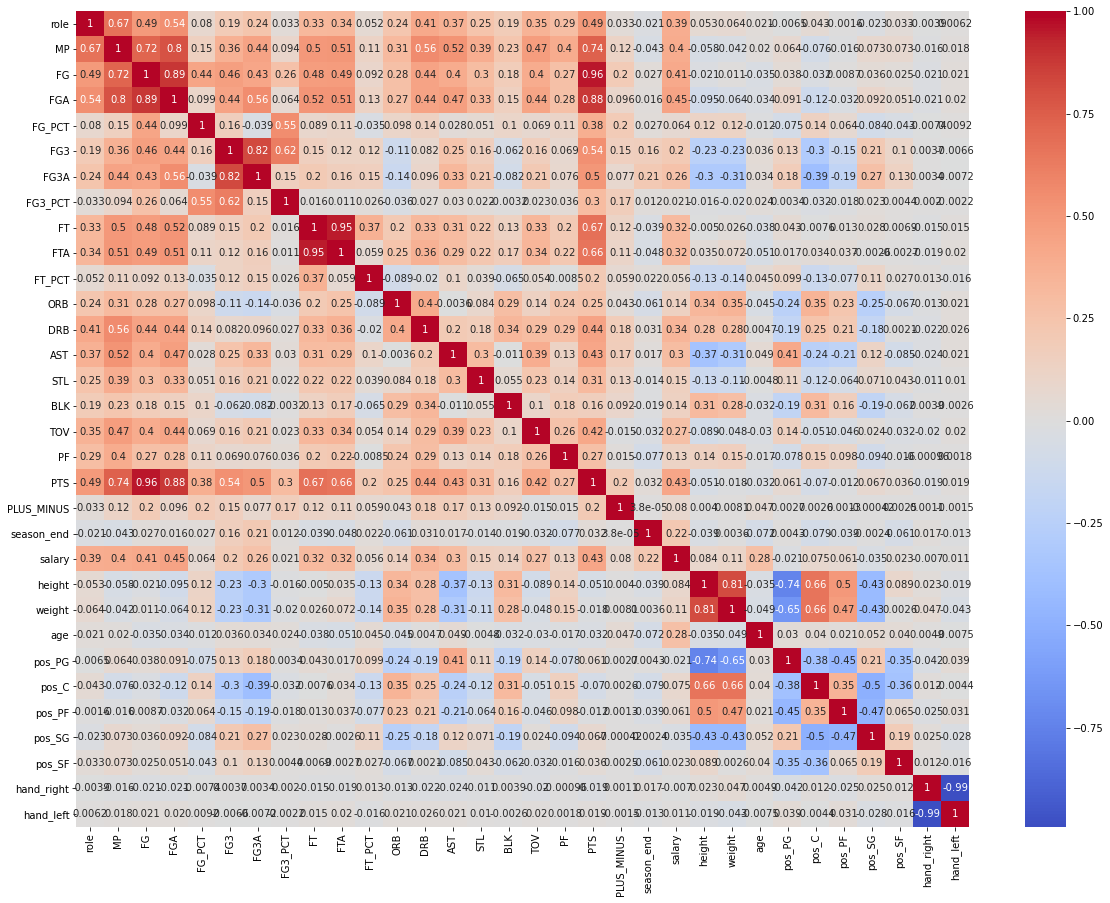

In [247]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)